# Week 8 Assignment - Machine Learning CSU44061
### Ernests Kuznecovs
### 17332791

(i)

(a)   

Assuming both kernel and input a squares, the number of times the kernel needs to be shifted is the kernels num rows - the input matrix's num rows.   
   
Every time the kernel is applied to the image, all the individual cells in the kernel and the corresponding cells in the input are multiplied and the summed with all the other positions in the kernel, and this counts as one cell in the output. This is done for every possible position the kernel can be in on the the input giving the output.

In [60]:
# n x n, k x k
def convolve(input_mat, kernel):
    n = input_mat.shape[0]
    k = kernel.shape[0]
    c = n - k # how many times a shift is needed
    output = np.arange((c+1) * (c+1)).reshape(c+1, c+1) # create appropriate size output
     
    for i in range(c+1):
        for j in range(c+1):
            summ = 0
            for n in range(k):
                for m in range (k):
                    summ = summ + kernel[n][m] * input_mat[i+n][j+m]
                    
            output[i][j] = summ;        
                       
    return output

(b)

Using the code supplied, an image is loaded, a channel isolated, cropped to be a square, recentered, and displayed.

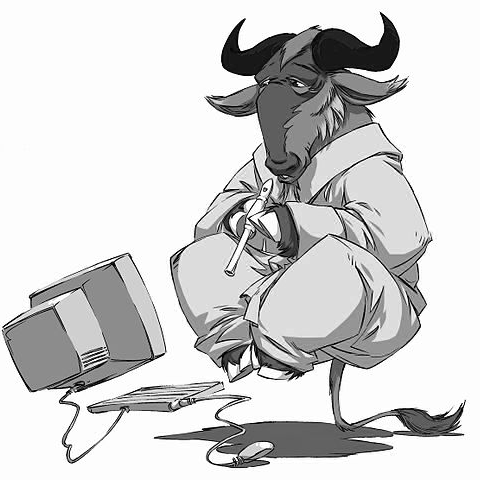

In [45]:
import numpy as np
from PIL import Image
from IPython.display import Image as i

im = Image.open('gnu.jpg')
rgb = np.array(im.convert('RGB'))
r=rgb[:,:,0] # array of R pixels
n = r.shape[0]
r = r[0:n, 50:n+50] # make it a square
single_channel_im = Image.fromarray(np.uint8(r))
display(single_channel_im)

The convolution kernel 'kernel1' is declared and applied to the image.      
   
In the resulting image, where the edges are, it resembles white noise. And where there are no details the 
convolution seems to completely remove any colour value that was otherwise there.   
   
This must be as the middle 8 and the singluar 8 -1's around the 8, sum up to zero if all of the pixels are the same value.   
  
Perhaps this kernel is detecting the areas in which change is occuring in the image.

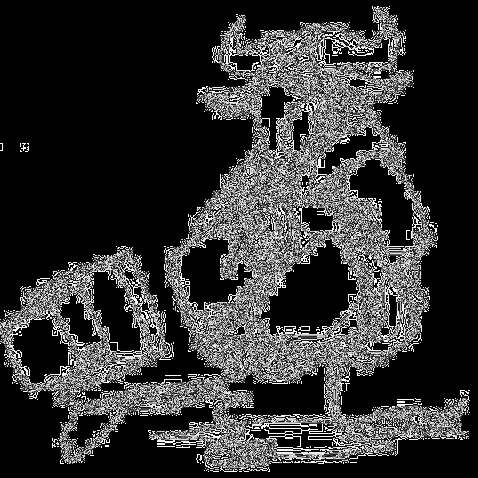

In [66]:
k1 = np.array([(-1,-1,-1), (-1,8,-1), (-1,-1,-1)])
conv_img = convolve(r,k1)
conv_img= Image.fromarray(np.uint8(conv_img))
display(conv_img)

'kernel2' is applied to the original image.

This kernel on the other hand does not completely cancel out when all the corresponding kernel values are the same. This kernel also detects the changes in the image, but also keeps part of the colour in areas where there is a solid colour.

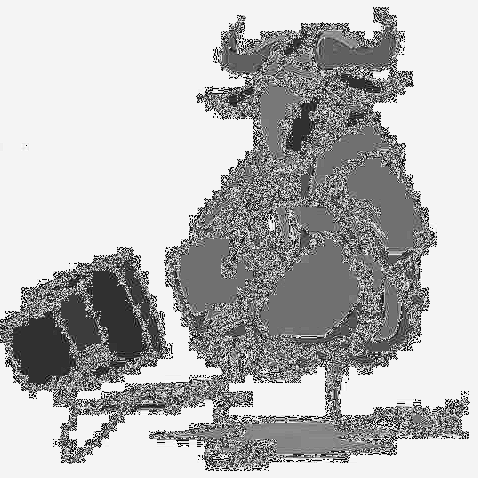

In [69]:
k2 = np.array([(0,-1,0), (-1,8,-1), (0,-1,0)])
conv_img = convolve(r,k2)
conv_img= Image.fromarray(np.uint8(conv_img))
display(conv_img)

(ii)

The provided code is copied and inserted below and executed.

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, LeakyReLU
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
plt.rc('font', size=18)
plt.rcParams['figure.constrained_layout.use'] = True
import sys

# Model / data parameters
num_classes = 10
input_shape = (32, 32, 3)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
n=5000
x_train = x_train[1:n]; y_train=y_train[1:n]
#x_test=x_test[1:500]; y_test=y_test[1:500]

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
print("orig x_train shape:", x_train.shape)

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

use_saved_model = False
if use_saved_model:
	model = keras.models.load_model("cifar.model")
else:
	model = keras.Sequential()
	model.add(Conv2D(16, (3,3), padding='same', input_shape=x_train.shape[1:],activation='relu'))
	model.add(Conv2D(16, (3,3), strides=(2,2), padding='same', activation='relu'))
	model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
	model.add(Conv2D(32, (3,3), strides=(2,2), padding='same', activation='relu'))
	model.add(Dropout(0.5))
	model.add(Flatten())
	model.add(Dense(num_classes, activation='softmax',kernel_regularizer=regularizers.l1(0.0001)))
	model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=["accuracy"])
	model.summary()

	batch_size = 128
	epochs = 20
	history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)
	model.save("cifar.model")
	plt.subplot(211)
	plt.plot(history.history['accuracy'])
	plt.plot(history.history['val_accuracy'])
	plt.title('model accuracy')
	plt.ylabel('accuracy')
	plt.xlabel('epoch')
	plt.legend(['train', 'val'], loc='upper left')
	plt.subplot(212)
	plt.plot(history.history['loss'])
	plt.plot(history.history['val_loss'])
	plt.title('model loss')
	plt.ylabel('loss'); plt.xlabel('epoch')
	plt.legend(['train', 'val'], loc='upper left')
	plt.show()

preds = model.predict(x_train)
y_pred = np.argmax(preds, axis=1)
y_train1 = np.argmax(y_train, axis=1)
print(classification_report(y_train1, y_pred))
print(confusion_matrix(y_train1,y_pred))

preds = model.predict(x_test)
y_pred = np.argmax(preds, axis=1)
y_test1 = np.argmax(y_test, axis=1)
print(classification_report(y_test1, y_pred))
print(confusion_matrix(y_test1,y_pred))

129310720/170498071 [=====================>........] - ETA: 25s

(a)   

 32 x 32 input with 3 channels   
 
all kernels have the same number of channels as the input, e.g kernels each have 3 channels at the very first layer for the input
one kernel creates one output channel  
   
layer 1 3x3 kernel size with 16 kernels, same padding   
layer 2 3x3 kernel size with 16 kernels, 2 strides, same padding   
layer 3 3x3 kernel size with 32 kernels, same padding   
layer 4 3x3 kernel size with 32 kernels, 2 strides, same padding   
dropout 0.5   
flattening into a dense layer 
     
layer 1 creates 16 output channels   
layer 2 creates 16 output channels     
layer 3 creates 32 output channels    
layer 4 creates 32 output channels
  
same padding means it is adding the extra size to the outside of the input of each layer such that 
the kernel doesn't reduce the output size.   
   
but since some layers have a stride of 2, the output at that layer will be reduced by a half,
when it gets to the second layer with strides the original input will have halfed twice, so the output will 
be 8 x 8 at layer 4     

a stride means by how much the kernel mask gets moved across the matrix its convolving   

layer 1 creates output of 32x32
layer 2 creates output of 16x16   
layer 3 creates output of 16x16   
layer 4 creates output of 8x8   

all layers have relu activation function, which adds nonlinearity to the output, if a single output
value is x < 0 then x = 0 else x = x    
      
   
flattening turns the output matrix into a vector since the layer 4 creates an output of 8x8x32, the size of the vector becomes 2048 when its flattened   
   
this flattened vector is inputed into the fully connected layer, or the dense layer, and the dense layer passes the vector through a non-linear function.    
   
the dense layer can have many functions, and in this case it is 10, therefore creating 10 outputs, each function using the 2048 size vector as input    
   
the nonlinear function used is softmax, which is a multi class logistic regression model, can think of the previous layers as creating features for this layer for a logistic regression model.

(b)

(i) 

First layer has 448 params, as kernel size is 3x3 and there are 3 channels per kernel, so 3x3x3, and then there are 16 kernels, so 3*3*3*16 = 432, and the +16 = 448, +1 for each activation function.     
Second layer has 2320 params.  3*3*16*16 + 16   
Third layer has 4640 params.   3*3*16*32 + 32 
Fourth layer has 9248 params.  3*3*32*32 + 32 
And finally the dense layer haas 20490.     
The dense layer has the most as it effectively has 10 models and each model is trained on a vector 2048 as the output of the last convolution layer is flattened. 2048 * 10 + 10(for the activation) = 20490
   
accuracy and loss are always slightly better on training than on the validation, but the validation tends to follow the metrics of the training.    

(ii)

When there is a slight spiked increase in accuracy on the training data, the validation data accuracy spikes in the opposite way, being less accurate, this could be an indication that the model is overfitting to the training data at that point

(iii)


With 20 epochs.    
5k:  1sec per epoch, train accuracy: 0.63, test accuracy: 0.52     
    
10k: 2sec per epoch,  train: 0.67, test: 0.56    
   
20k: 4sec per epoch,  train: 0.69, test: 0.61      
   
40k: 7sec per epoch,  train: 0.73, test: 0.68   



As training data increased, the graphs for training and test accuracy became closer together, seometimes the 
test accuracy overtook the training in accuracy   
   
The gap between training and test accuracy closes as training data is increased.   
   
The overall accuracy also increases the more training data is used.

(iv)

With higher numbers of l1, the prediction accuracy becomes lower.    
It seems like the training fails to fit to the dataset properly as the test accuracy overtakes the training accuracy.


(c)

Left uncomplete due to poor management.